# Predicting Car Prices

### Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [45]:
df = pd.read_csv(r"C:\Users\tejas\Documents\OIBSIP\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [46]:
df.shape

(301, 9)

In [47]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [49]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [50]:
df = df.drop(columns=['Car_Name'])
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df = df.dropna()

In [52]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [53]:
df['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [54]:
numerical_columns = ['Year', 'Present_Price', 'Driven_kms']
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission']

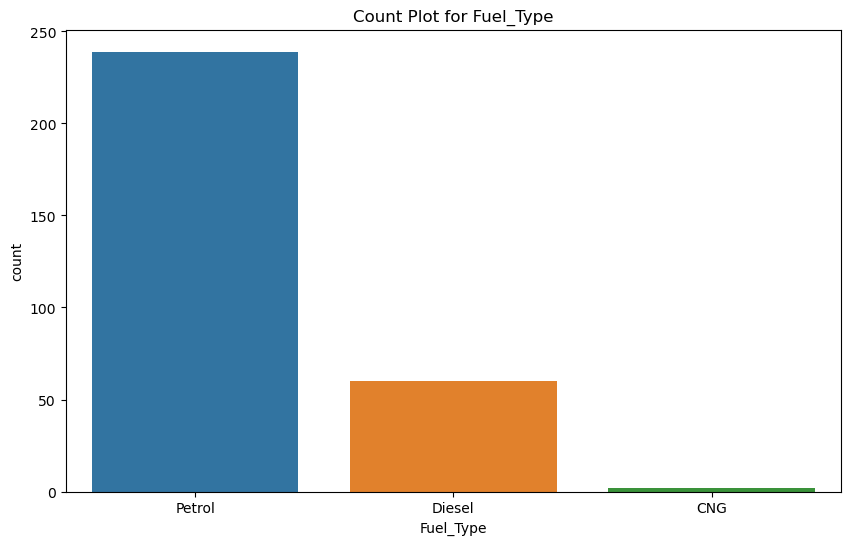

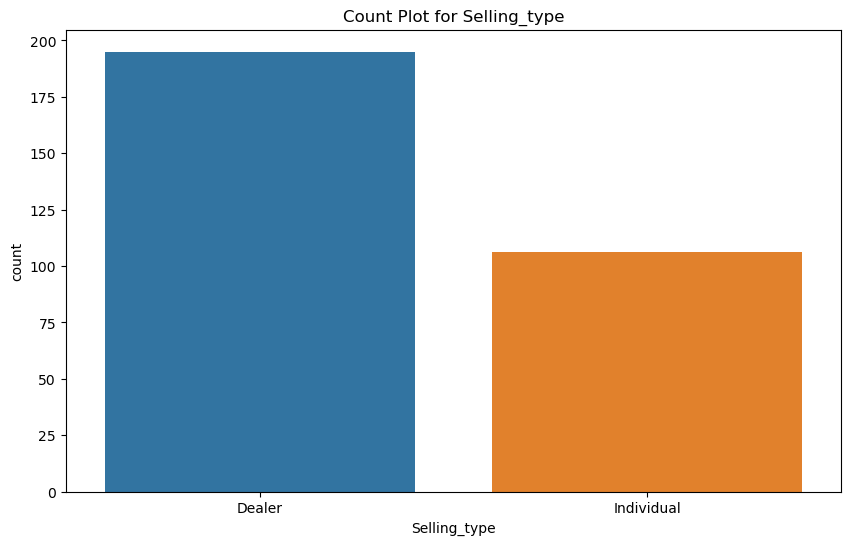

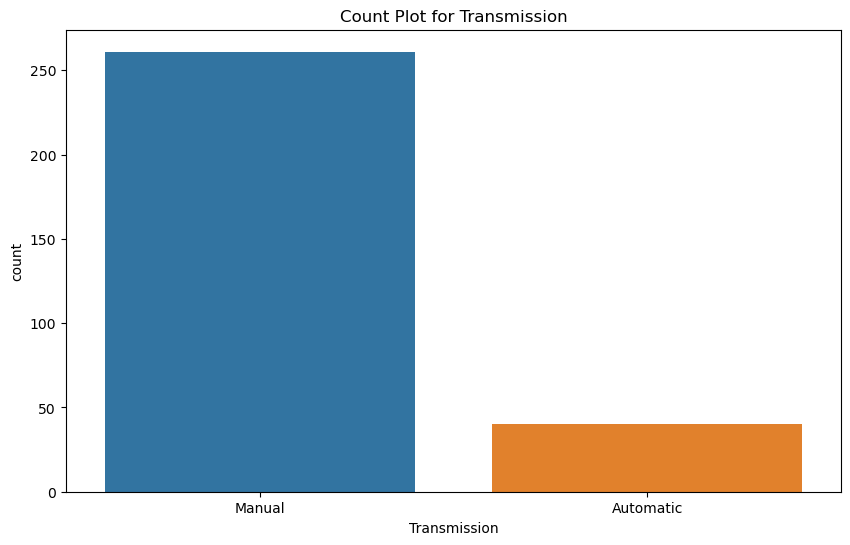

In [55]:
for col in categorical_columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot for {col}')
    plt.show()

In [56]:
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

### Training the model

In [57]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [59]:
X_train.shape

(210, 8)

In [60]:
X_test.shape

(91, 8)

In [61]:
y_train.shape

(210,)

In [62]:
y_test.shape

(91,)

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 185 to 102
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     210 non-null    int64  
 1   Present_Price            210 non-null    float64
 2   Driven_kms               210 non-null    int64  
 3   Owner                    210 non-null    int64  
 4   Fuel_Type_Diesel         210 non-null    bool   
 5   Fuel_Type_Petrol         210 non-null    bool   
 6   Selling_type_Individual  210 non-null    bool   
 7   Transmission_Manual      210 non-null    bool   
dtypes: bool(4), float64(1), int64(3)
memory usage: 9.0 KB


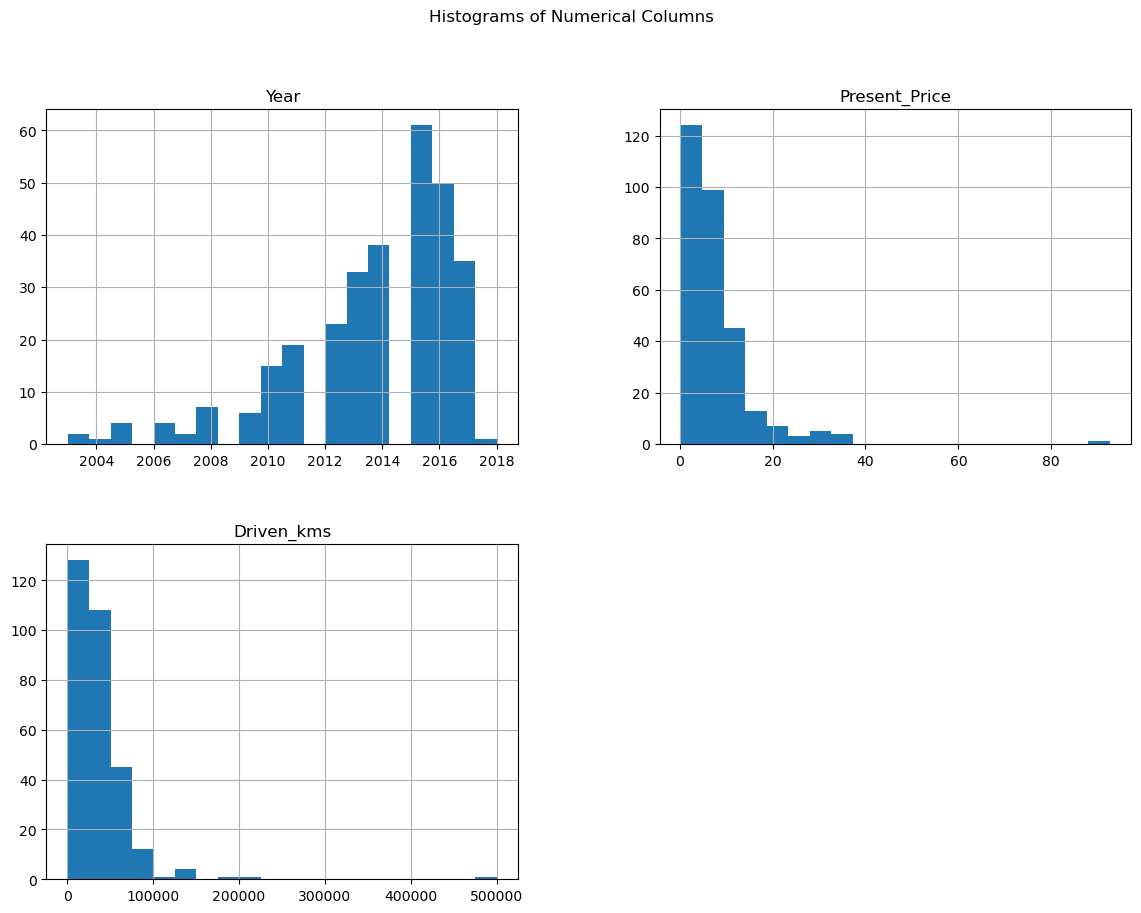

In [64]:
X[numerical_columns].hist(bins=20, figsize=(14,10))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

### Model Fitting

### Linear Regression

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
score_lr = round(r2_score(y_test,y_pred_lr)*100,2)
print("The R2 score achieved using Linear Regression is: "+str(score_lr)+" %")

The R2 score achieved using Linear Regression is: 87.55 %


### Random Forest

In [66]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
score_rf = round(r2_score(y_test,y_pred_rf)*100,2)
print("The R2 score achieved using Random Forest is: "+str(score_rf)+" %")

The R2 score achieved using Random Forest is: 95.71 %


#### The Random Forest model performed the best with a R2 score of 96.38%

### Loading the model and Making Predictions

In [68]:
import pickle

In [72]:
with open('car_price_predict.pkl','wb') as file:
    pickle.dump(rf, file)
with open('car_price_predict.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [74]:
input_data = ("inova",2017,18,50000,"Diesel","Dealer","Automatic",0)

In [79]:
input_df = pd.DataFrame([input_data], columns=['Car_Name','Year','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner'])

In [80]:
input_df = input_df.drop(columns=['Car_Name'])
input_df = pd.get_dummies(input_df,columns=categorical_columns,drop_first=True)

In [81]:
input_df = input_df.reindex(columns=X.columns, fill_value=0)

In [82]:
input_array = input_df.values

In [84]:
prediction = loaded_model.predict(input_array)
print(f"The predicted selling price is: {prediction[0]:.2f}")

The predicted selling price is: 13.66
